# LAB7: Text Summarization with Transformers

Import necessary libraries

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random


## Data exploration

In [3]:
# read the test data
cnn_test_DF = pd.read_csv('contents/cnn_dailymail/test.csv')

# get the article and summary lengths
art_lengths = [len(art) for art in cnn_test_DF['article']]
summary_lengths = [len(high) for high in cnn_test_DF['highlights']]

# get the mean, median, max and min lengths of the articles and summaries
mean_articles_len = np.mean(art_lengths)
mean_summary_len = np.mean(summary_lengths)

# get the median length of the articles and summaries
median_article_len = np.median(art_lengths)
median_summary_len = np.median(summary_lengths )

# get the max and min length of the articles and summaries
max_article_len = max(art_lengths)
min_article_len = min(art_lengths)

# get the max and min length of the summaries
max_summary_len = max(summary_lengths)
min_summary_len = min(summary_lengths)

#print the statistics
print("Statistics of the article in test.  \n MEAN LENGTH: ", round(mean_articles_len,2),"\n MEDIAN LENGTH: ", median_article_len, "\n MAX LENGTH: ", max_article_len, "\n MIN LENGHT: ", min_article_len, "\n")
print("Statistics of the summary  in test: \n MEAN LENGTH: ", round(mean_summary_len, 2),"\n MEDIAN LENGTH: ", median_summary_len, "\n MAX LENGTH: ", max_summary_len, "\n MIN LENGHT: ", min_summary_len)

Statistics of the article in test.  
 MEAN LENGTH:  3967.08 
 MEDIAN LENGTH:  3563.0 
 MAX LENGTH:  11991 
 MIN LENGHT:  293 

Statistics of the summary  in test: 
 MEAN LENGTH:  311.93 
 MEDIAN LENGTH:  290.0 
 MAX LENGTH:  3410 
 MIN LENGHT:  51


In [4]:
# display the first 5 rows of the test data
cnn_test_DF.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [5]:
# read the train data
cnn_train_DF = pd.read_csv('contents/cnn_dailymail/train.csv')

# get the article and summary lengths
art_lengths = [len(art) for art in cnn_train_DF['article']]
summary_lengths = [len(high) for high in cnn_train_DF['highlights']]

# get the mean, median, max and min lengths of the articles and summaries
mean_articles_len = np.mean(art_lengths)
mean_summary_len = np.mean(summary_lengths)

# get the median length of the articles and summaries
median_article_len = np.median(art_lengths)
median_summary_len = np.median(summary_lengths)

# get the max and min length of the articles and summaries
max_article_len = max(art_lengths)
min_article_len = min(art_lengths)

# get the max and min length of the summaries
max_summary_len = max(summary_lengths)
min_summary_len = min(summary_lengths)

# print the statistics
print("Statistics of the article in train.  \n MEAN LENGTH: ", round(mean_articles_len,2),"\n MEDIAN LENGTH: ", median_article_len, "\n MAX LENGTH: ", max_article_len, "\n MIN LENGHT: ", min_article_len, "\n")
print("Statistics of the summary  in train: \n MEAN LENGTH: ", round(mean_summary_len, 2),"\n MEDIAN LENGTH: ", median_summary_len, "\n MAX LENGTH: ", max_summary_len, "\n MIN LENGHT: ", min_summary_len)

Statistics of the article in train.  
 MEAN LENGTH:  4033.66 
 MEDIAN LENGTH:  3682.0 
 MAX LENGTH:  15925 
 MIN LENGHT:  48 

Statistics of the summary  in train: 
 MEAN LENGTH:  294.77 
 MEDIAN LENGTH:  280.0 
 MAX LENGTH:  7388 
 MIN LENGHT:  14


In [6]:
# display the first 5 rows of the train data
cnn_train_DF.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [7]:
# get the number of words in the articles
articles_words = [word for art in cnn_train_DF['article'] for word in nltk.word_tokenize(art)]

# get the number of words in the summaries
print(f"Number of words in the articles: {len(articles_words)}")

Number of words in the articles: 226321221


In [8]:
# get the number of words in the summaries
summary_words = [word for summary in cnn_train_DF['highlights'] for word in nltk.word_tokenize(summary)]

# get the number of words in the summaries
print(f'Number of words in the summaries: {len(summary_words)}')

Number of words in the summaries: 15700368


In [9]:
from nltk.probability import FreqDist

# get the frequency distribution of the words in the articles
freq_dist = FreqDist(articles_words)
print('The 10 most common words in the articles are: ', freq_dist.most_common(10))

The 10 most common words in the articles are:  [('.', 10981509), ('the', 9814275), (',', 9201684), ('to', 5350678), ('of', 4562222), ('a', 4515081), ('and', 4506425), ('in', 3855630), ('was', 1928029), ('that', 1816287)]


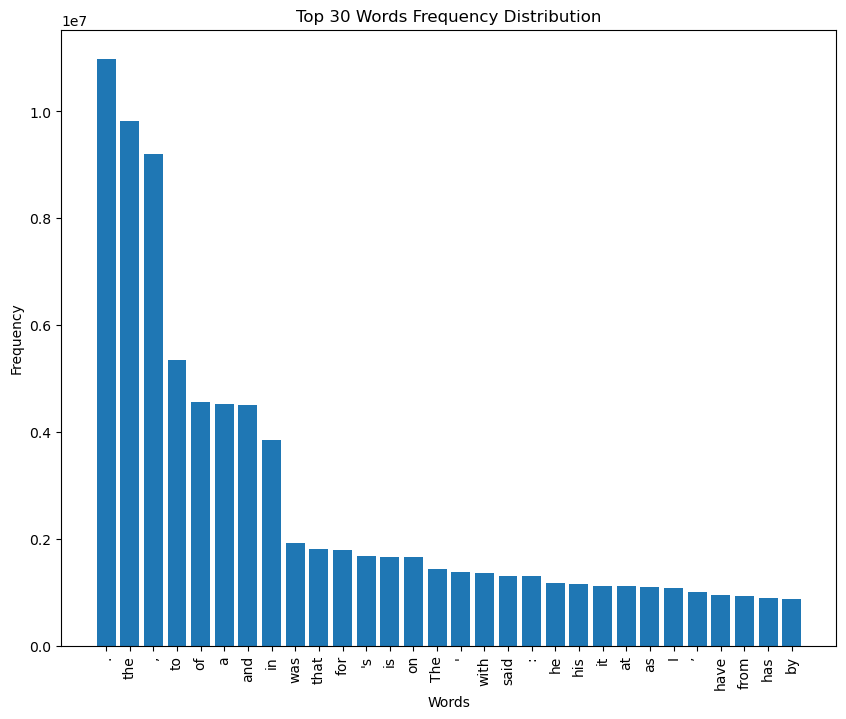

In [10]:
# get the top 30 most common words in the articles
top_30 = freq_dist.most_common(30)

# get the words and frequencies
words, frequencies = zip(*top_30)

# plot the top 30 words frequency distribution
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xticks(rotation=90)  # Rotate the word labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Frequency Distribution')
plt.show()

In [11]:
from nltk.probability import FreqDist

# get the frequency distribution of the words in the summaries
freq_dist_summary = FreqDist(summary_words)
print('The 10 most common words in the summaries are: ', freq_dist_summary.most_common(10))

The 10 most common words in the summaries are:  [('.', 1031301), ('the', 445211), (',', 407300), ('to', 364782), ('in', 319895), ('of', 286681), ('and', 259329), ('a', 257606), ('was', 142766), ('for', 141983)]


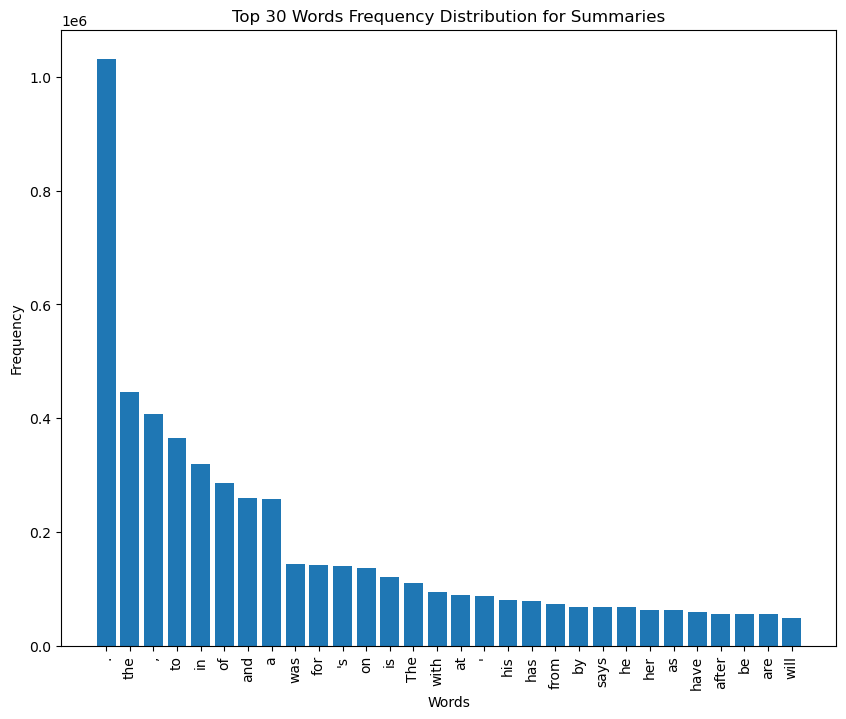

In [12]:
# get the top 30 most common words in the summaries
top_30 = freq_dist_summary.most_common(30)

# get the words and frequencies
words, frequencies = zip(*top_30)

# plot the top 30 words frequency distribution
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xticks(rotation=90)  # Rotate the word labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Frequency Distribution for Summaries')
plt.show()

Let's plot the wordcloud of both the original text and the summary to see the most frequent words in the text.


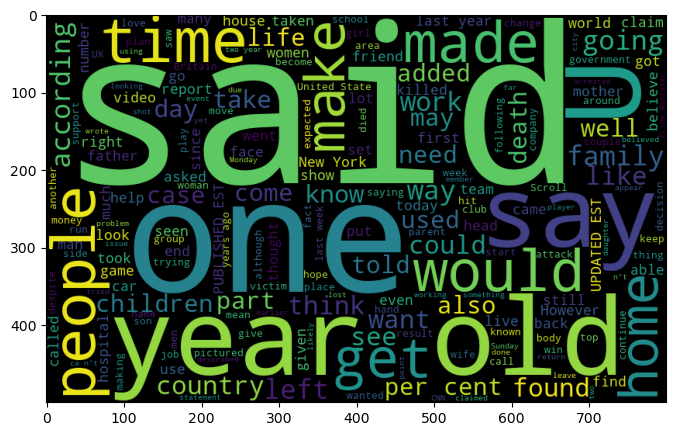

In [13]:
# Word Cloud
from wordcloud import WordCloud

# generate the word cloud for the articles
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 10).generate(' '.join(articles_words))

# plot the word cloud for the articles
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

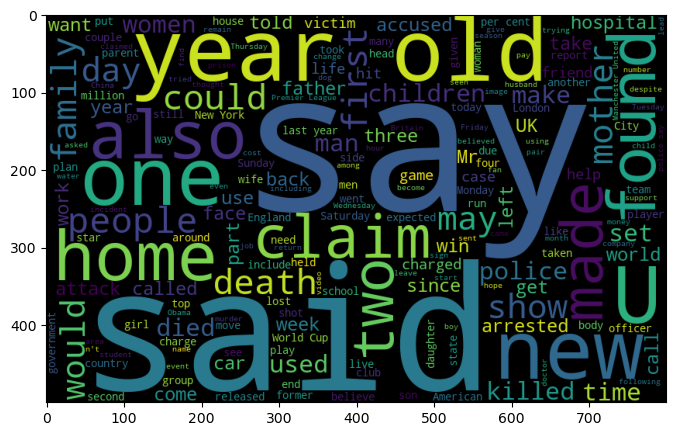

In [14]:
# generate the word cloud for the articles
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 10).generate(' '.join(summary_words))

# plot the word cloud for the articles
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

### Reduce the dataset to include
• 9,000 instances in train

• 5,000 instances in validation

• 5,000 instances in test

In [15]:
#Read the data and store it in dataframes
cnn_train_DF = pd.read_csv('contents/cnn_dailymail/train.csv')
cnn_test_DF = pd.read_csv('contents/cnn_dailymail/test.csv')
cnn_validation_DF = pd.read_csv('contents/cnn_dailymail/validation.csv')

In [16]:
#Truncate the data to 9000 training samples, 5000 validation samples and 5000 test samples
cnn_train_DF = cnn_train_DF[:9000]
cnn_test_DF = cnn_test_DF[:5000]
cnn_validation_DF = cnn_validation_DF[:5000]

## The Preprocessing

Preprocess and tokenize the data using MT5 tokenizer, this will convert the text data into a format that can be used by the model.

In [17]:
#Import the necessary libraries for tokenization with MT5
from transformers import MT5Tokenizer
from datasets import Dataset

#Load the MT5 tokenizer which will be used to tokenize the data
tokenizer = MT5Tokenizer.from_pretrained('google/mt5-small')

#Define a function to encode the data
def encode(examples):
    # Tokenization can be batched (handle a list of texts), we finally dont set max length bcs 30 tokens for the summary is not enough
    input_encodings = tokenizer(examples['article'], truncation=True, padding='max_length')#, max_length=512)
    target_encodings = tokenizer(examples['highlights'], truncation=True, padding='max_length')#, max_length=30)
    # Return a dictionary with the required fields, omit attention_mask as it is not needed, and is always 1,1,1
    return {'input_ids': input_encodings['input_ids'], 
            'labels': target_encodings['input_ids']}

# Convert Train DataFrame to Dataset
cnn_train_dataset = Dataset.from_pandas(cnn_train_DF)

# Convert Test DataFrame to Dataset
cnn_test_dataset = Dataset.from_pandas(cnn_test_DF)

# Convert Validation DataFrame to Dataset
cnn_validation_dataset = Dataset.from_pandas(cnn_validation_DF)

# Use map function for tokenization, map is used for speeding up the process
tokenized_train_dataset = cnn_train_dataset.map(encode, batched=True)
tokenized_test_dataset = cnn_test_dataset.map(encode, batched=True)
tokenized_validation_dataset = cnn_validation_dataset.map(encode, batched=True)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [18]:
#Let's print the first example of the tokenized dataset, which includes the input_ids and labels
print(tokenized_train_dataset[0])

{'id': '0001d1afc246a7964130f43ae940af6bc6c57f01', 'article': "By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through cont

Test if it works

In [19]:
# Decode the first entry back to text to check if the tokenization was done correctly
sample_article = tokenizer.decode(tokenized_train_dataset[0]['input_ids'], skip_special_tokens=True)
sample_summary = tokenizer.decode(tokenized_train_dataset[0]['labels'], skip_special_tokens=True)

# Print the sample article and summary
print("Sample Article:", sample_article)
print("Sample Summary:", sample_summary)


2024-04-24 23:33:33.955307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Sample Article: By. Associated Press. PUBLISHED:. 14:11 EST, 25 October 2013. |. UPDATED:. 15:36 EST, 25 October 2013. The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A. State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly or

In [20]:
# iterate over 5 random samples and print the article and summary
for i in random.sample(range(len(tokenized_train_dataset)), 5):
    print(f"Sample {i} - Article:", tokenizer.decode(tokenized_train_dataset[i]['input_ids'], skip_special_tokens=True))
    print(f"Sample {i} - Summary:", tokenizer.decode(tokenized_train_dataset[i]['labels'], skip_special_tokens=True))
    print()

Sample 4386 - Article: Ahead of this weekend's Premier League action, Sportsmail will be providing you with all you need to know about every fixture, with team news, provisional squads, betting odds and Opta stats. Here is all the information you need for Tottenham's home clash with Stoke... Tottenham Hotspur vs Stoke City (White Hart Lane) Kick-off: Sunday 1.30pm. Odds (subject to change):. Tottenham 4/6. Draw 11/4. Stoke 4/1. Referee: Mike Jones. Managers: Mauricio Pochettino (Tottenham), Mark Hughes (Stoke) Head-to-head league record: Tottenham wins 42, draws 17, Stoke wins 19. Team news. Tottenham. Aaron Lennon and Emmanuel Adebayor are to be assessed before Tottenham's return to Premier League action against Stoke. The pair were rested for the midweek Europa League trip to Asteras Tripoli due to slight hamstring complaints. Kyle Walker continues to miss out following abdominal surgery, while Nabil Bentaleb is absent due to an ankle complaint. Provisional squad: Lloris, Vorm, Fried

In [21]:
# Check the distribution of lengths
input_lengths = [len(sample['input_ids']) for sample in tokenized_train_dataset]
label_lengths = [len(sample['labels']) for sample in tokenized_train_dataset]

print("Input lengths:", input_lengths, "\nMean input length:", np.mean(input_lengths))
print("Label lengths:", label_lengths, "\nMean label length:", np.mean(label_lengths))


Input lengths: [332, 616, 1304, 825, 961, 512, 1116, 1000, 945, 1319, 2033, 1083, 1678, 680, 1284, 771, 1104, 2352, 668, 588, 763, 2239, 981, 1276, 1016, 888, 865, 2330, 283, 703, 1181, 1382, 1437, 2697, 719, 462, 1402, 559, 1806, 550, 982, 663, 895, 1354, 597, 897, 1062, 1062, 1392, 2169, 651, 952, 1034, 1102, 524, 980, 1420, 1125, 1500, 562, 1543, 1043, 275, 853, 769, 1927, 1020, 904, 1351, 495, 1421, 732, 754, 762, 1685, 1446, 1273, 1815, 2469, 2053, 597, 1102, 419, 1444, 1037, 1325, 840, 1361, 1319, 1134, 1162, 253, 1011, 643, 891, 1892, 380, 276, 642, 1339, 693, 838, 1374, 821, 539, 609, 1843, 1415, 653, 1484, 768, 1188, 844, 1103, 889, 1219, 480, 1217, 511, 2279, 273, 875, 319, 749, 493, 1164, 524, 1390, 920, 1091, 855, 911, 1953, 733, 1423, 646, 1048, 399, 1124, 835, 711, 1079, 674, 624, 1168, 992, 1094, 1293, 656, 1194, 496, 1024, 1319, 298, 1758, 1533, 1054, 2425, 1518, 692, 1999, 409, 1017, 887, 343, 1105, 977, 750, 1724, 1690, 2044, 1040, 982, 2433, 1504, 1053, 653, 1170, 13

## The Evaluation

In [22]:
#import rogue scorer for Rogue-1, Rogue-2 and Rogue-L, Rogue-s must be done apart.
from rouge_score import rouge_scorer

# The prediction and reference sentences, just for testing
prediction_1 = "The cat and the dog are sitting on the mat"
reference_1 = "The cat is on the mat"

# The scorer can be created once and used for multiple evaluations
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate scores for the example sentences
scores = scorer.score(reference_1, prediction_1)

# Print scores
print(f"ROUGE-1 Precision: {scores['rouge1'].precision:.2f}")
print(f"ROUGE-1 Recall: {scores['rouge1'].recall:.2f}")
print(f"ROUGE-1 F-measure: {scores['rouge1'].fmeasure:.2f}")
print("------------------------")
print(f"ROUGE-2 Precision: {scores['rouge2'].precision:.2f}")
print(f"ROUGE-2 Recall: {scores['rouge2'].recall:.2f}")
print(f"ROUGE-2 F-measure: {scores['rouge2'].fmeasure:.2f}")
print("------------------------")
print(f"ROUGE-L Precision: {scores['rougeL'].precision:.2f}")
print(f"ROUGE-L Recall: {scores['rougeL'].recall:.2f}")
print(f"ROUGE-L F-measure: {scores['rougeL'].fmeasure:.2f}")



ROUGE-1 Precision: 0.50
ROUGE-1 Recall: 0.83
ROUGE-1 F-measure: 0.62
------------------------
ROUGE-2 Precision: 0.33
ROUGE-2 Recall: 0.60
ROUGE-2 F-measure: 0.43
------------------------
ROUGE-L Precision: 0.50
ROUGE-L Recall: 0.83
ROUGE-L F-measure: 0.62


The rogue-s must be computed by ourself as it is not included in the rogue_scorer library.

In [23]:
import nltk
from itertools import combinations

# Define a function to generate skip-bigrams
def skip_bigrams(tokens, k=2):
    # Generate skip-bigrams with a distance of up to k words between them
    skip_bigrams = set()
    #iterate over the tokens
    for i, first_word in tokens:
        #iterate over the tokens
        for j in range(i+1, i+k+1):
            #check if the token is in the tokens
            if j < len(tokens):
                #get the second word
                second_word = tokens[j][0]
                #add the skip-bigram to the set
                skip_bigrams.add((first_word, second_word))
    #return the skip-bigrams
    return skip_bigrams

# Tokenize the sentences and enumerate tokens
prediction_tokens = list(enumerate(nltk.word_tokenize("The black cat and the dog")))
reference_tokens = list(enumerate(nltk.word_tokenize("The cat is on the mat")))

# Get skip-bigrams for the prediction and reference sentences
prediction_skip_bigrams = skip_bigrams(prediction_tokens)
reference_skip_bigrams = skip_bigrams(reference_tokens)

# Calculate the matches between the prediction and reference skip-bigrams
matches = len(prediction_skip_bigrams.intersection(reference_skip_bigrams))

# Calculate precision, recall, and F1 score
precision_s = matches / len(prediction_skip_bigrams) if prediction_skip_bigrams else 0
recall_s = matches / len(reference_skip_bigrams) if reference_skip_bigrams else 0
f1_score_s = 2 * (precision_s * recall_s) / (precision_s + recall_s) if (precision_s + recall_s) > 0 else 0

# Print skip-bigram scores
print("ROUGE-S Precision:", precision_s)
print("ROUGE-S Recall:", recall_s)
print("ROUGE-S F1-Score:", f1_score_s)


ROUGE-S Precision: 0.4444444444444444
ROUGE-S Recall: 0.4444444444444444
ROUGE-S F1-Score: 0.4444444444444444


## The Baseline

In [24]:
import nltk
from rouge_score import rouge_scorer
from nltk.tokenize import sent_tokenize

# Get the first article and summary from the tokenized dataset for testing
article_text = tokenizer.decode(tokenized_train_dataset[0]['input_ids'], skip_special_tokens=True)
summary = tokenizer.decode(tokenized_train_dataset[0]['labels'], skip_special_tokens=True)

# Tokenize the article into sentences and take the first three
sentences = sent_tokenize(article_text)
lead3_summary = '\n'.join(sentences[:])

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(summary, lead3_summary)

# Display the results
print(f"Lead-3 Summary:\n{lead3_summary}\n")
print("ROUGE scores:")
for score_type, score_values in scores.items():
    print(f"{score_type}: {score_values}")


Lead-3 Summary:
By.
Associated Press.
PUBLISHED:.
14:11 EST, 25 October 2013.
|.
UPDATED:.
15:36 EST, 25 October 2013.
The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October.
The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion.
Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A.
State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure.
The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A.
The diocese says he contracted the infection through contaminated food while attending a conference for newly or

Now let's compute this for the whole val dataset and see the results.

In [25]:
import numpy as np
from tqdm import tqdm  # For progress bar
import torch

# Function to calculate ROUGE for a single pair of summary and reference
def calculate_rouge_for_pair(article, reference, scorer):
    # Tokenize the article into sentences and take the first three
    sentences = sent_tokenize(article)
    lead3_summary = '\n'.join(sentences[:3]) #we can modify this to take the n first sentences we want

    # Calculate ROUGE scores
    scores = scorer.score(reference, lead3_summary)

    return scores

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)


all_scores = []

# Loop over all examples in the validation dataset
for idx in tqdm(range(len(tokenized_validation_dataset))):
    article_text = tokenizer.decode(tokenized_validation_dataset[idx]['input_ids'], skip_special_tokens=True)
    highlights = tokenizer.decode(tokenized_validation_dataset[idx]['labels'], skip_special_tokens=True)
    
    # Calculate ROUGE scores for this pair
    scores = calculate_rouge_for_pair(article_text, highlights, scorer)
    
    # Append the scores
    all_scores.append(scores)

# Now calculate the average scores
average_scores = {
    metric: np.mean([score[metric].fmeasure for score in all_scores]) for metric in ['rouge1', 'rouge2', 'rougeL']
}

print("Average ROUGE scores on the validation dataset:")
print(average_scores)


100%|██████████| 5000/5000 [02:42<00:00, 30.68it/s]

Average ROUGE scores on the validation dataset:
{'rouge1': 0.4083358877830864, 'rouge2': 0.1800712840318424, 'rougeL': 0.2549698244702202}


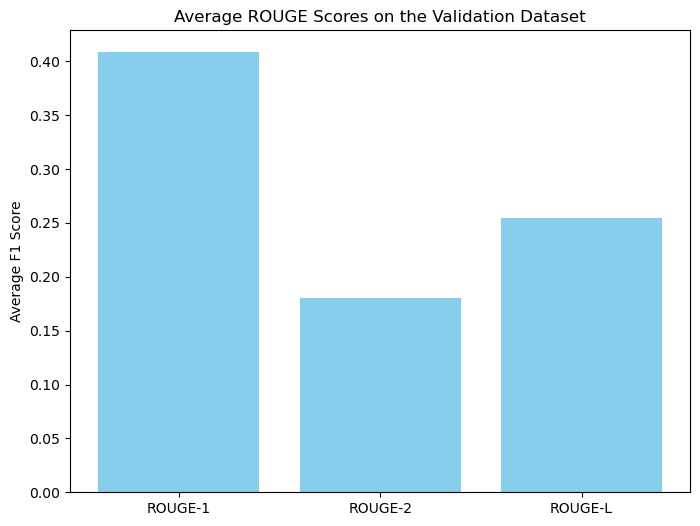

In [26]:
#Plot the results in a more visual way
import matplotlib.pyplot as plt

# Get the average scores for each metric
rouge1_score = average_scores['rouge1']
rouge2_score = average_scores['rouge2']
rougeL_score = average_scores['rougeL']

# Plot the average scores
plt.figure(figsize=(8, 6))
plt.bar(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'], [rouge1_score, rouge2_score, rougeL_score], color='skyblue')
plt.ylabel('Average F1 Score')
plt.title('Average ROUGE Scores on the Validation Dataset')
plt.show()



As you can see above the baseline of nltk is not very good, let's try to improve it by using the MT5 model.

## The Model´s FineTuning

In [1]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import load_metric
import torch

model = AutoModelForSeq2SeqLM.from_pretrained('google/mt5-small')

# Define the data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Function to compute ROUGE scores as metrics
def compute_metrics(eval_pred):
    rouge = load_metric("rouge")
    logits, labels = eval_pred
    predictions = torch.argmax(logits, dim=-1)
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them
    decoded_labels = [label.replace(tokenizer.pad_token, '') for label in decoded_labels]
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return {key: value.mid.fmeasure for key, value in result.items()}

# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True
)

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validation_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# You can evaluate the model on the validation set to check its performance
trainer.evaluate()

2024-04-25 00:37:32.118008: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/hhome/nlp2_g09/anaconda3/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


NameError: name 'tokenizer' is not defined

## The Results